In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HousesDataset/HousesInfo.txt', header=None, sep=' ', names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

In [3]:
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [4]:
data.index.values + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
sorted(list(glob.glob(os.path.sep.join(['HousesDataset', "{}_*".format(1)]))))

['HousesDataset\\1_bathroom.jpg',
 'HousesDataset\\1_bedroom.jpg',
 'HousesDataset\\1_frontal.jpg',
 'HousesDataset\\1_kitchen.jpg']

In [7]:
basepath = os.path.sep.join(['HousesDataset', "{}_*".format(1)])
imgPaths = sorted(list(glob.glob(basepath)))
inputImages = []
for imgPath in imgPaths:
    image = cv2.resize(cv2.imread(imgPath), (32, 32))
    inputImages.append(image)
np.shape(inputImages)

(4, 32, 32, 3)

In [8]:
images = []
for i in data.index.values:
    basepath = os.path.sep.join(['HousesDataset', "{}_*".format(i + 1)])
    imgPaths = sorted(list(glob.glob(basepath)))
    inputImages = []
    for imgPath in imgPaths:
        image = cv2.resize(cv2.imread(imgPath), (32, 32))
        inputImages.append(image)
    outputImage = np.zeros((64, 64, 3), dtype='uint8')
    outputImage[0:32, 0:32] = inputImages[0]
    outputImage[0:32, 32:64] = inputImages[1]
    outputImage[32:64, 32:64] = inputImages[2]
    outputImage[32:64, 0:32] = inputImages[3]
    images.append(outputImage)

In [9]:
images = np.array(images)
images.shape

(535, 64, 64, 3)

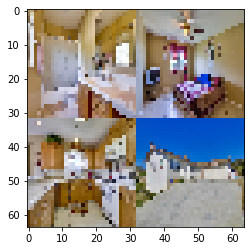

In [10]:
plt.imshow(images[100][..., ::-1])

In [11]:
X_train, X_test, IX_train, IX_test = train_test_split(data, images, random_state=523)

In [12]:
maxPrice = X_train['price'].max()
y_train = X_train['price'] / maxPrice
y_test = X_test['price'] / maxPrice

In [13]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate, Input, Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization

In [15]:
input1 = Input(shape=(64, 64, 3))
conv1 = Conv2D(16, (3, 3), padding='same', activation='relu')(input1)
batchnorm1 = BatchNormalization(axis=-1)(conv1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
conv2 = Conv2D(32, (3, 3), padding='same', activation='relu')(maxpool1)
batchnorm2 = BatchNormalization(axis=-1)(conv2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
conv3 = Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool2)
batchnorm3 = BatchNormalization(axis=-1)(conv3)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(batchnorm3)
flatten1 = Flatten()(maxpool3)
dense1 = Dense(32, activation='relu')(flatten1)
batchnorm4 = BatchNormalization(axis=-1)(dense1)
dropout1 = Dropout(0.5)(batchnorm4)
dense2 = Dense(16, activation='relu')(dropout1)

In [16]:
m1 = Model(input1, dense2)

In [17]:
m1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128   

In [18]:
ss = StandardScaler()
XT = ss.fit_transform(X_train[['bedrooms', 'bathrooms', 'area']])
Xt = ss.transform(X_test[['bedrooms', 'bathrooms', 'area']])

In [19]:
lb = LabelBinarizer()
lb.fit(data['zipcode'])
XTz = lb.transform(X_train['zipcode'])
Xtz = lb.transform(X_test['zipcode'])

In [20]:
XTz[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [21]:
XT = np.hstack([XT, XTz])
Xt = np.hstack([Xt, Xtz])

In [22]:
XT[0]

array([0.51790082, 0.32814078, 0.36211477, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [23]:
XT.shape

(401, 52)

In [24]:
m2 = Sequential()
m2.add(Dense(16, activation='relu', input_dim=52))
m2.add(Dropout(0.5))
m2.add(Dense(8, activation='relu'))
m2.add(Dense(4, activation='relu'))

In [25]:
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                848       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [26]:
combinedModel = concatenate([m2.output, m1.output])

In [27]:
densef1 = Dense(8, activation='relu')(combinedModel)
densef2 = Dense(1, activation='linear')(densef1)
model = Model(inputs=[m2.input, m1.input], outputs=densef2)

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 64, 64, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 64, 64, 16)  64          ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 16)  0           ['batch_normalization_4[0][

In [29]:
from tensorflow.keras.utils import plot_model

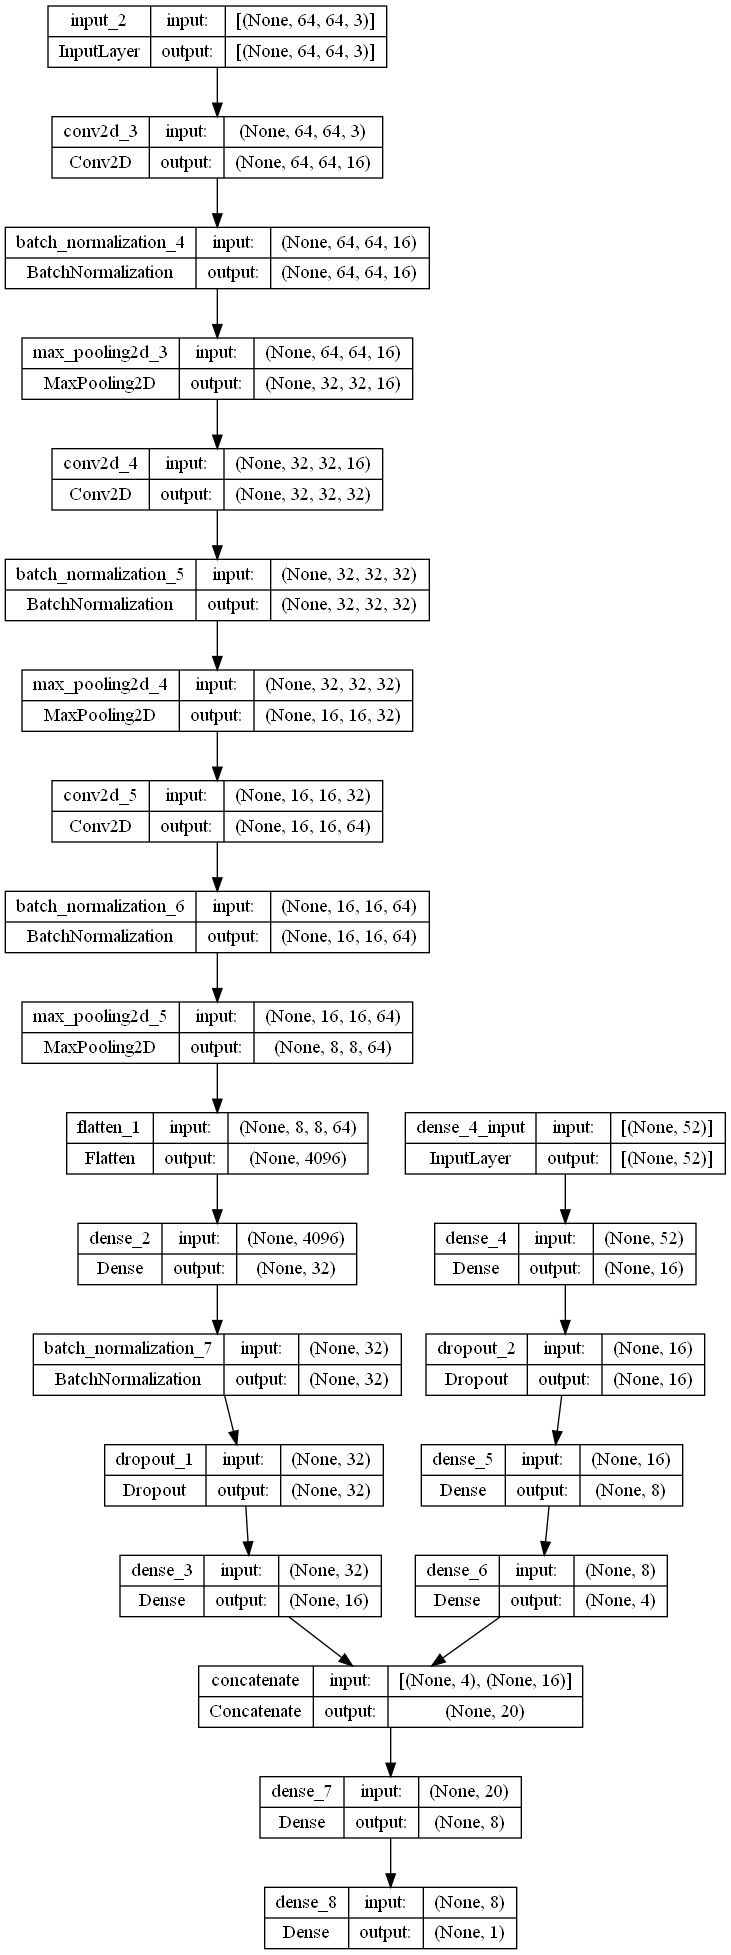

In [30]:
plot_model(model, show_shapes=True)

In [31]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [32]:
model.fit([XT, IX_train], y_train, validation_data=([Xt, IX_test], y_test), epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 4s 69ms/step - loss: 0.4486 - val_loss: 0.4161
Epoch 2/100
41/41 [==============================] - 3s 62ms/step - loss: 0.2691 - val_loss: 0.2633
Epoch 3/100
41/41 [==============================] - 2s 60ms/step - loss: 0.2259 - val_loss: 0.1410
Epoch 4/100
41/41 [==============================] - 3s 61ms/step - loss: 0.1831 - val_loss: 0.1075
Epoch 5/100
41/41 [==============================] - 3s 66ms/step - loss: 0.1610 - val_loss: 0.1028
Epoch 6/100
41/41 [==============================] - 3s 63ms/step - loss: 0.1321 - val_loss: 0.1040
Epoch 7/100
41/41 [==============================] - 3s 77ms/step - loss: 0.1245 - val_loss: 0.0911
Epoch 8/100
41/41 [==============================] - 3s 76ms/step - loss: 0.1149 - val_loss: 0.0924
Epoch 9/100
41/41 [==============================] - 3s 68ms/step - loss: 0.1059 - val_loss: 0.0895
Epoch 10/100
41/41 [==============================] - 3s 67ms/step - loss: 0.1089 - val_loss: 0.1720

41/41 [==============================] - 2s 48ms/step - loss: 0.0368 - val_loss: 0.0512
Epoch 83/100
41/41 [==============================] - 2s 48ms/step - loss: 0.0384 - val_loss: 0.0498
Epoch 84/100
41/41 [==============================] - 2s 49ms/step - loss: 0.0393 - val_loss: 0.0513
Epoch 85/100
41/41 [==============================] - 2s 49ms/step - loss: 0.0383 - val_loss: 0.0550
Epoch 86/100
41/41 [==============================] - 2s 48ms/step - loss: 0.0364 - val_loss: 0.0502
Epoch 87/100
41/41 [==============================] - 2s 49ms/step - loss: 0.0373 - val_loss: 0.0524
Epoch 88/100
41/41 [==============================] - 2s 48ms/step - loss: 0.0371 - val_loss: 0.0514
Epoch 89/100
41/41 [==============================] - 2s 49ms/step - loss: 0.0370 - val_loss: 0.0479
Epoch 90/100
41/41 [==============================] - 2s 48ms/step - loss: 0.0387 - val_loss: 0.0496
Epoch 91/100
41/41 [==============================] - 2s 48ms/step - loss: 0.0358 - val_loss: 0.0515
Epo

In [34]:
predicts = model.predict([Xt, IX_test]) * maxPrice

5/5 [==============================] - 0s 37ms/step


In [35]:
predicts.flatten()

array([ 825351.0594368 ,  474848.92606735,  215944.45407391,
        541392.02833176,  403500.85496902,  365824.99742508,
        187079.29551601,  244702.53288746,  704110.56280136,
        475846.29058838,  328125.77486038,  489237.12968826,
        186431.21421337,  466168.820858  ,  219370.32043934,
        382620.09620667,  508594.69175339,  468573.51064682,
        513630.03253937,  161151.03662014, 1203781.0087204 ,
       1634632.34901428,  524903.05900574,  475094.73562241,
        811892.68827438,  206940.60623646,  516413.56945038,
        401686.37037277,  429422.43814468,  201560.54198742,
       1020330.07144928,  450083.79220963,  510864.61544037,
        381914.97325897,  477376.63984299,  617830.15727997,
        385094.165802  ,  230805.38213253,  549312.35313416,
        421656.5489769 ,  253744.60220337,  240530.05874157,
        302067.22021103,  603819.84710693,  898541.68891907,
        979598.34337234,  497239.05324936, 1111618.28041077,
        397958.99391174,

In [36]:
y_test.values * maxPrice

array([1039000.,  529800.,  184900.,  569950.,  309900.,  529000.,
         99000.,   69900., 1495000.,  557000.,  335000.,  547900.,
         74900.,  144900.,  117500.,  399900.,  455000.,  214900.,
        699000.,  104900.,  869000., 3850000., 5858000.,  499000.,
        895000.,  219500.,  599500.,  449000.,  500000.,  103500.,
        519200.,  664900.,  538000.,  449000.,  599999.,  649000.,
        310000.,   69500.,  479000.,  435000.,   97500.,  400000.,
        360000.,  567000., 1039000., 1327685.,  619000., 2150000.,
        458000.,  445000.,  629000.,  649000.,  549950.,  539900.,
        599999.,  695000.,  147000.,  310000.,  599000.,  385000.,
        259000.,  700000., 1195000.,  429900.,  639000.,  245000.,
        525000.,  710000.,  579000.,  925000.,  644900.,  895000.,
        750000.,  549999.,  625000.,  117000.,  962500.,  521500.,
        235000., 1500000.,   69900.,  135000.,  725000.,  529999.,
        389900.,  365000., 1299000., 1294000.,  530000.,  5348

In [37]:
diff = abs(predicts.flatten() - (y_test * maxPrice))

In [38]:
diff

11     213648.940563
81      54951.073933
75      31044.454074
524     28557.971668
436     93600.854969
           ...      
430    151347.844505
92     392083.553314
141    123475.868702
244     39903.116035
486     11012.649536
Name: price, Length: 134, dtype: float64

In [39]:
diff.mean()

198792.64818871912

In [40]:
data['price'].mean()

589362.8112149533

In [41]:
data['price'].std()

509026.06764905667

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error

In [43]:
r2_score(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

0.28922214013780245

In [44]:
abs(model.predict([Xt, IX_test]).flatten() - y_test).mean() * maxPrice

5/5 [==============================] - 0s 45ms/step


198792.6481887191